
# Tight-Binding Models
Rafael A. Molina
Instituto de Estructura de la Materia (CSIC)

rafael.molina@csic.es

Welcome! This notebook provides interactive explorations of some fundamental tight-binding models:

1D chain (finite OBC/PBC + infinite-lattice dispersion)
Two-site 1D chain (dimer or SSH model)
Graphene (honeycomb) nearest-neighbor model

Each section includes:

Explanations to guide intuition.

Widgets so you can change parameters in real time.

Figures to visualize spectra, states, and band structures.

It is prepared for run in Google Colab:
https://colab.research.google.com
so you do not need to install Python and its libraries.

Tip for Google Colab: run the Setup cell first.

In [1]:

#@title Setup (run me first in Colab)
try:
    from google.colab import output  # type: ignore
    output.enable_custom_widget_manager()
except Exception:
    pass

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, FloatSlider, Dropdown, VBox, HBox, Play, jslink, Checkbox, Layout, Button
from IPython.display import display, clear_output, Markdown

plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.grid"] = True


In [2]:
#Utility Helpers

def show_spectrum(ax, evals, title="Eigenvalues", xlabel="Index", ylabel="Energy"):
    ax.plot(np.arange(len(evals)), np.sort(evals),"o",markersize=4)
    ax.set_xlabel(xlabel); ax.set_ylabel(ylabel); ax.set_title(title)


## 1) 1D Tight-Binding Chain

We study a chain of $N$ sites with on-site energy $\varepsilon$ and nearest-neighbor hopping $t$.  
Open (OBC) and periodic (PBC) boundary conditions are supported.

**Finite chain:** diagonalize the $N\times N$ Hamiltonian and visualize eigenvalues and selected eigenvectors.  
**Infinite chain:** dispersion relation $E(k) = \varepsilon - 2t\cos(ka)$.


In [3]:
# Interactive finite chain (OBC/PBC)

def make_hamiltonian_chain(N=10, t=1.0, eps=0.0, pbc=False):
    """Return NxN TB Hamiltonian for a 1D chain with OBC or PBC."""
    H = np.zeros((N, N), dtype=float)
    np.fill_diagonal(H, eps)
    for i in range(N-1):
        H[i, i+1] = -t
        H[i+1, i] = -t
    if pbc and N > 2:
        H[0, -1] = -t
        H[-1, 0] = -t
    return H

def band_1d_infinite(k, t=1.0, eps=0.0, a=1.0):
    """Dispersion for an infinite 1D nearest-neighbor TB chain: E(k)=eps-2t cos(ka)."""
    return eps - 2.0 * t * np.cos(k * a)



def plot_chain(N=10, t=1.0, eps=0.0, pbc=False, show_mode=False, mode_index=0):
    H = make_hamiltonian_chain(N=N, t=t, eps=eps, pbc=pbc)
    evals, evecs = np.linalg.eigh(H)

    fig, ax = plt.subplots()
    show_spectrum(ax, evals, title=f"1D Chain Spectrum (N={N}, t={t:.2f}, eps={eps:.2f}, {'PBC' if pbc else 'OBC'})")
    plt.show()

    if show_mode:
        mode_index = int(np.clip(mode_index, 0, N-1))
        vec = evecs[:, mode_index]
        fig, ax = plt.subplots()
        ax.plot(np.arange(N), vec, lw=1.5)
        ax.set_xlabel("site index"); ax.set_ylabel("amplitude")
        ax.set_title(f"Eigenvector #{mode_index} (E = {evals[mode_index]:.3f})")
        plt.show()

_ = interact(
    plot_chain,
    N=IntSlider(value=10, min=3, max=80, step=1, description="N"),
    t=FloatSlider(value=1.0, min=0.0, max=5.0, step=0.05, description="t"),
    eps=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.05, description="ε"),
    pbc=Checkbox(value=False, description="PBC"),
    show_mode=Checkbox(value=False, description="Show eigenvector"),
    mode_index=IntSlider(value=0, min=0, max=79, step=1, description="Eigenvector #")
)


interactive(children=(IntSlider(value=10, description='N', max=80, min=3), FloatSlider(value=1.0, description=…

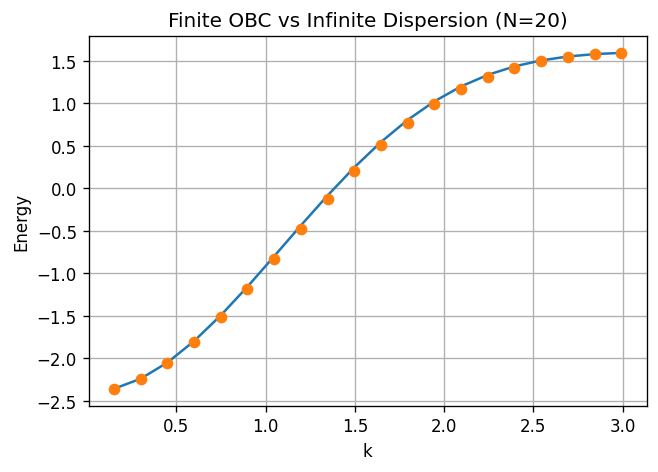

In [5]:
def k_grid_1d(N, a=1.0, bc="OBC"):
    if bc.upper() == "OBC":
        m = np.arange(1, N+1)
        return m*np.pi/((N+1)*a)
    else:  # PBC
        if N % 2 == 0:
            n = np.arange(-N//2, N//2)
        else:
            n = np.arange(-(N//2), N//2+1)
        return 2*np.pi*n/(N*a)

def E_inf_1d(k, t=1.0, tprime=0.0, eps=0.0, a=1.0):
    return eps - 2*t*np.cos(k*a) - 2*tprime*np.cos(2*k*a)

def make_hamiltonian_chain_tprime(N=10, t=1.0, eps=0.0, pbc=False, tprime=0.0):
    """Return NxN TB Hamiltonian for a 1D chain with OBC or PBC."""
    H = np.zeros((N, N), dtype=float)
    np.fill_diagonal(H, eps)
    for i in range(N-1):
        H[i, i+1] = -t
        H[i+1, i] = -t
    for i in range(N-2):
        H[i,i+2] = -tprime
        H[i+2,i] = -tprime
    if pbc and N > 2:
        H[0, -1] = -t
        H[-1, 0] = -t
        H[1, -1] = -tprime
        H[-1, 1] = -tprime
        H[0, -2] = -tprime
        H[-2, 0] = -tprime
    return H

def overlay_finite_vs_infinite_1d(N=60, t=1.0, tprime=0.0, eps=0.0, a=1.0, bc="OBC"):
    H = make_hamiltonian_chain_tprime(N=N, t=t, eps=eps, pbc=(bc.upper()=="PBC"), tprime=tprime)
    evals, _ = np.linalg.eigh(H)
    k = k_grid_1d(N, a=a, bc=bc)
    # sort both by k to make a nice curve
    ks = np.sort(k)
    Einf = E_inf_1d(ks, t=t, tprime=tprime, eps=eps, a=a)

    fig, ax = plt.subplots()
    ax.plot(ks, Einf)                           # infinite curve
    ax.plot(np.sort(k), np.sort(evals), "o")    # finite eigenvalues as points vs their k
    ax.set_xlabel("k"); ax.set_ylabel("Energy")
    ax.set_title(f"Finite {bc} vs Infinite Dispersion (N={N})")
    plt.show()



overlay_finite_vs_infinite_1d(N=20, t=1.0, tprime=0.2, eps=0.0, a=1.0, bc="OBC")




## 1) SSH-like Chain with On-Site Energies and Next-Nearest Neighbor \(t'\)

Model parameters (per unit cell with sublattices A/B):

Nearest neighbor hopping
- Intracell NN hopping: $t_1$  ($A_n$ ↔ $B_n$)
- Intercell NN hopping: $t_2$ ($B_n$ ↔ $A_{n+1}$)

Next-to-nearest neighbor hoppint
- Same-sublattice NNN between adjacent cells: $t'_{AA}$ ($A_n$ ↔ $A_{n+1}$), $t'_{BB}$ ($B_n$ ↔ $B_{n+1}$)

- On-site energies: $\varepsilon_A$, $\varepsilon_B$

**Finite OBC**: diagonalize, view spectrum, eigenmodes, and edge-localization.  

**Infinite**: Bloch Hamiltonian

$H(k)=\begin{pmatrix}
\varepsilon_A - 2 t'_{AA}\cos(ka) & -(t_1 + t_2 e^{-ika})\\
-(t_1 + t_2 e^{ika}) & \varepsilon_B - 2 t'_{BB}\cos(ka)
\end{pmatrix}.
$



In [6]:

def ssh_make_hamiltonian(M=20, t1=1.0, t2=0.5, epsA=0.0, epsB=0.0, tAAp=0.0, tBBp=0.0, pbc=False):
    """Finite OBC/PBC Hamiltonian for SSH-like chain with same-sublattice NNN hoppings between adjacent cells."""
    N = 2*M
    H = np.zeros((N,N), dtype=float)
    # onsite
    for n in range(M):
        A = 2*n; B = 2*n+1
        H[A,A] = epsA
        H[B,B] = epsB
    # NN hoppings
    for n in range(M):
        A = 2*n; B = 2*n+1
        H[A,B] = H[B,A] = -t1              # intracell
        if n < M-1:
            A_next = 2*(n+1)
            H[B, A_next] = H[A_next, B] = -t2  # intercell
    if pbc and M>1:
        H[2*M-1, 0] = H[0, 2*M-1] = -t2

    # NNN same-sublattice between neighboring cells
    for n in range(M-1):
        A = 2*n; A_next = 2*(n+1)
        B = 2*n+1; B_next = 2*(n+1)+1
        H[A, A_next] = H[A_next, A] = -tAAp
        H[B, B_next] = H[B_next, B] = -tBBp
    if pbc and M>1:
        H[0, 2*M-2] = H[2*M-2, 0] = -tAAp
        H[1, 2*M-1] = H[2*M-1, 1] = -tBBp
    return H

def plot_ssh_finite(M=24, t1=1.0, t2=0.5, epsA=0.0, epsB=0.0, tAAp=0.0, tBBp=0.0, pbc=False,
                    show_mode=False, mode_index=0, edge_window=2):
    H = ssh_make_hamiltonian(M=M, t1=t1, t2=t2, epsA=epsA, epsB=epsB, tAAp=tAAp, tBBp=tBBp, pbc=pbc)
    evals, evecs = np.linalg.eigh(H)
    fig, ax = plt.subplots()
    show_spectrum(ax, evals, title=f"SSH-like spectrum (N={2*M}, t1={t1:.2f}, t2={t2:.2f}, tAA'={tAAp:.2f}, tBB'={tBBp:.2f}, εA={epsA:.2f}, εB={epsB:.2f}, {'PBC' if pbc else 'OBC'})")
    plt.show()

    # edge weight
    N = 2*M
    edge_idx = np.r_[np.arange(edge_window), np.arange(N-edge_window, N)]
    edge_weight = np.sum(np.abs(evecs[edge_idx,:])**2, axis=0)
    fig, ax = plt.subplots()
    ax.plot(np.arange(N), edge_weight)
    ax.set_xlabel("eigenstate index"); ax.set_ylabel("edge weight")
    ax.set_title(f"Edge-localization indicator (edge window={edge_window})")
    plt.show()

    if show_mode:
        idx = int(np.clip(mode_index, 0, N-1))
        vec = evecs[:, idx]
        fig, ax = plt.subplots()
        ax.plot(np.arange(N), np.abs(vec)**2)
        ax.set_xlabel("site index"); ax.set_ylabel("|ψ|^2")
        ax.set_title(f"Eigenvector #{idx} (E = {evals[idx]:.5f})")
        plt.show()

_ = interact(
    plot_ssh_finite,
    M=IntSlider(value=24, min=4, max=200, step=1, description="cells M"),
    t1=FloatSlider(value=1.0, min=0.0, max=5.0, step=0.05, description="t1"),
    t2=FloatSlider(value=0.5, min=0.0, max=5.0, step=0.05, description="t2"),
    epsA=FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.05, description="εA"),
    epsB=FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.05, description="εB"),
    tAAp=FloatSlider(value=0.0, min=-1.5, max=1.5, step=0.05, description="tAA'"),
    tBBp=FloatSlider(value=0.0, min=-1.5, max=1.5, step=0.05, description="tBB'"),
    pbc=Checkbox(value=False, description="PBC"),
    show_mode=Checkbox(value=False, description="Show eigenvector"),
    mode_index=IntSlider(value=0, min=0, max=99, step=1, description="Eigenvector #"),
    edge_window=IntSlider(value=2, min=1, max=10, step=1, description="edge sites")
)


interactive(children=(IntSlider(value=24, description='cells M', max=200, min=4), FloatSlider(value=1.0, descr…


## 2) Graphene Ribbon (Brick-Wall Representation)

We use a **brick-wall** lattice (topologically equivalent to the honeycomb) with two sublattices per cell.  
Nearest-neighbor bonds are mapped to three types with hoppings \(t_1, t_2, t_3\):
- **t1**: within-cell A(i,j)–B(i,j)
- **t2**: A(i,j)–B(i-1,j)  (left bond)
- **t3**: A(i,j)–B(i,j-1)  (down bond)

Build a finite \(N_x\times N_y\) ribbon with OBC and visualize:
- Spectrum
- Edge-localization indicator (weight on boundary sites)
- A chosen eigenmode as a 2D heatmap over the lattice sites with the honeycomb structure.


In [7]:
def brickwall_positions_honeycomb(Nx, Ny, a=1.0):
    """
    Real-space positions for sites in the SAME order as idx(i,j,sub):
        idx(i,j,sub) = (j*Nx + i)*2 + sub,  sub=0(A),1(B).
    Honeycomb geometry consistent with bonds:
        A(i,j) -- B(i, j), B(i-1, j), B(i, j-1)
    """
    N = 2*Nx*Ny
    pos = np.zeros((N, 2), dtype=float)
    rt3 = np.sqrt(3.0)

    # Lattice vectors and basis
    a1 = np.array([rt3*a, 0.0])
    a2 = np.array([0.5*rt3*a, 1.5*a])
    rA = np.array([0.0, 0.0])
    rB = np.array([0.5*rt3*a, 0.5*a])

    for j in range(Ny):
        for i in range(Nx):
            R = i*a1 + j*a2
            A = (j*Nx + i)*2 + 0
            B = (j*Nx + i)*2 + 1
            pos[A, :] = R + rA
            pos[B, :] = R + rB
    return pos

def brick_edges_for_plot(Nx, Ny):
    """
    Edges that match your Hamiltonian exactly:
      A(i,j) -- B(i,j), B(i-1,j), B(i,j-1)  (when in range)
    """
    def idx(i,j,sub): return (j*Nx + i)*2 + sub
    edges = []
    for j in range(Ny):
        for i in range(Nx):
            A = idx(i,j,0)
            # within cell
            edges.append(tuple(sorted((A, idx(i, j, 1)))))
            # left neighbor
            if i-1 >= 0:
                edges.append(tuple(sorted((A, idx(i-1, j, 1)))))
            # down neighbor
            if j-1 >= 0:
                edges.append(tuple(sorted((A, idx(i, j-1, 1)))))
    # deduplicate
    edges = sorted(set(edges))
    return edges

def plot_honeycomb_mode(psi, pos, edges=None, ax=None, pointsize=46, cmap='viridis'):
    """
    Scatter lattice points colored by |psi|^2. Optionally draw bonds.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    rho = np.abs(psi)**2
    if rho.max() > 0:
        rho = rho / rho.max()

    # draw bonds first so points sit on top
    if edges is not None:
        for u, v in edges:
            ax.plot([pos[u,0], pos[v,0]], [pos[u,1], pos[v,1]], lw=0.6, alpha=0.25, zorder=0)

    sc = ax.scatter(pos[:,0], pos[:,1], c=rho, s=pointsize, cmap=cmap, marker='o', linewidths=0, zorder=1)
    ax.set_aspect('equal')
    ax.axis('off')
    cbar = plt.colorbar(sc, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(r'$|\psi|^2$ normalized to max density', rotation=0, labelpad=56)
    ax.set_title("Eigenmode density on the honeycomb lattice")
    return ax




def brick_indices(Nx, Ny):
    # map (i,j,sub) -> index. sub=0(A),1(B). Returns index arrays A,B and a helper
    def idx(i,j,sub):
        return (j*Nx + i)*2 + sub
    return idx

def brickwall_hamiltonian(Nx=20, Ny=8, t1=1.0, t2=1.0, t3=1.0):
    N = 2*Nx*Ny
    H = np.zeros((N,N), dtype=float)
    idx = brick_indices(Nx, Ny)
    for i in range(Nx):
        for j in range(Ny):
            A = idx(i,j,0)
            B = idx(i,j,1)
            # on-site zeros; could be extended
            # bonds:
            # t1 within cell
            H[A,B] = H[B,A] = -t1
            # t2 left: A(i,j) -- B(i-1,j)
            if i-1 >= 0:
                Bleft = idx(i-1,j,1)
                H[A, Bleft] = H[Bleft, A] = -t2
            # t3 down: A(i,j) -- B(i,j-1)
            if j-1 >= 0:
                Bdown = idx(i,j-1,1)
                H[A, Bdown] = H[Bdown, A] = -t3
    return H

def boundary_mask_brick(Nx, Ny):
    idx = brick_indices(Nx, Ny)
    N = 2*Nx*Ny
    mask = np.zeros(N, dtype=bool)
    for i in range(Nx):
        for j in range(Ny):
            for sub in (0,1):
                k = idx(i,j,sub)
                if i==0 or i==Nx-1 or j==0 or j==Ny-1:
                    mask[k] = True
    return mask

def plot_brick_ribbon(Nx=24, Ny=12, t1=1.0, t2=1.0, t3=1.0, show_mode=False, mode_index=0):
    H = brickwall_hamiltonian(Nx=Nx, Ny=Ny, t1=t1, t2=t2, t3=t3)
    evals, evecs = np.linalg.eigh(H)
    fig, ax = plt.subplots()
    show_spectrum(ax, evals, title=f"Brick-wall ribbon spectrum (Nx={Nx}, Ny={Ny}, t1={t1:.2f}, t2={t2:.2f}, t3={t3:.2f})")
    plt.show()

    # edge-localization
    mask = boundary_mask_brick(Nx, Ny)
    edge_weight = np.sum(np.abs(evecs[mask,:])**2, axis=0)
    fig, ax = plt.subplots()
    ax.plot(np.arange(len(evals)), edge_weight)
    ax.set_xlabel("eigenstate index"); ax.set_ylabel("edge weight")
    ax.set_title("Edge-localization indicator (boundary total weight)")
    plt.show()

    # if show_mode:
    #    idxf = int(np.clip(mode_index, 0, len(evals)-1))
    #    psi = evecs[:, idxf]
    #    # cell-resolved density = |A|^2 + |B|^2
    #    dens = np.zeros((Ny, Nx))
    #    idx = brick_indices(Nx, Ny)
    #    for i in range(Nx):
    #        for j in range(Ny):
    #            A = idx(i,j,0); B = idx(i,j,1)
    #            dens[j,i] = (np.abs(psi[A])**2 + np.abs(psi[B])**2)
    #    fig, ax = plt.subplots()
    #    im = ax.imshow(dens, origin='lower', aspect='auto')
    #    ax.set_xlabel("x cell"); ax.set_ylabel("y cell")
    #    ax.set_title(f"Eigenmode #{idxf} density heatmap")
    #    plt.colorbar(im, ax=ax)
    #    plt.show()

    if show_mode:
        idxf = int(np.clip(mode_index, 0, len(evals)-1))
        psi = evecs[:, idxf]

        # real-space positions in the same ordering as your indexing
        pos = brickwall_positions_honeycomb(Nx, Ny, a=1.0)

        # (optional) draw bonds that match your Hamiltonian's neighbors
        edges = brick_edges_for_plot(Nx, Ny)

        fig, ax = plt.subplots()
        plot_honeycomb_mode(psi, pos, edges=edges, ax=ax, pointsize=16, cmap='viridis')
        ax.set_title(f"Eigenmode #{idxf} density on honeycomb")
        plt.show()

_ = interact(
    plot_brick_ribbon,
    Nx=IntSlider(value=24, min=6, max=80, step=2, description="Nx"),
    Ny=IntSlider(value=12, min=4, max=40, step=1, description="Ny"),
    t1=FloatSlider(value=1.0, min=0.0, max=3.0, step=0.05, description="t1"),
    t2=FloatSlider(value=1.0, min=0.0, max=3.0, step=0.05, description="t2"),
    t3=FloatSlider(value=1.0, min=0.0, max=3.0, step=0.05, description="t3"),
    show_mode=Checkbox(value=False, description="Show eigenmode"),
    mode_index=IntSlider(value=0, min=0, max=1000, step=1, description="Eigenmode #")
)


interactive(children=(IntSlider(value=24, description='Nx', max=80, min=6, step=2), IntSlider(value=12, descri…

Honeycomb lattice dispersion for the infinite lattice as a function of $k_x$ and $k_y$

# Dispersion (infinite honeycomb, 3 anisotropic hoppings)


* Lattice vectors:
  $a_1=(\sqrt{3}a,,0), \quad \mathbf a_2=(\tfrac{\sqrt{3}}{2}a,,\tfrac{3}{2}a)$

* Basis:
  $r_A=(0,0), \quad \mathbf r_B=(\tfrac{\sqrt{3}}{2}a,,\tfrac{1}{2}a)$

$\delta_1=\left(\tfrac{\sqrt{3}}{2}a,,\tfrac{1}{2}a\right),\quad
\delta_2=\left(-\tfrac{\sqrt{3}}{2}a,,\tfrac{1}{2}a\right),\quad
\delta_3=\left(0,,-a\right)$.

Bloch Hamiltonian in the ((A,B)) basis:

$H(\mathbf k)=
\begin{pmatrix}
0 & f(\mathbf k)\\
f^*(\mathbf k) & 0
\end{pmatrix}, \\
f(\mathbf k)=t_1 e^{i\mathbf k\cdot\boldsymbol\delta_1}
+t_2 e^{i\mathbf k\cdot\boldsymbol\delta_2}
+t_3 e^{i\mathbf k\cdot\boldsymbol\delta_3}.
$

Eigenvalues (dispersion):

$E_\pm(\mathbf k)=\pm \left|f(\mathbf k)\right|$.

This reproduces standard graphene when $t_1=t_2=t_3$, and opens/gaps/shifts Dirac points when the hoppings are anisotropic.



In [12]:
def lattice_vectors(a=1.0):
    rt3 = np.sqrt(3.0)
    a1 = np.array([rt3*a, 0.0])
    a2 = np.array([0.5*rt3*a, 1.5*a])
    return a1, a2

def basis_and_deltas(a=1.0):
    rt3 = np.sqrt(3.0)
    rA = np.array([0.0, 0.0])
    rB = np.array([0.5*rt3*a, 0.5*a])
    d1 = rB - rA
    a1, a2 = lattice_vectors(a)
    d2 = -a1 + d1
    d3 = -a2 + d1
    return rA, rB, (d1, d2, d3)

def reciprocal_vectors(a=1.0):
    # Compute b1, b2 s.t. Ai·Bj = 2π δij
    a1, a2 = lattice_vectors(a)
    A = np.column_stack((a1, a2))           # 2x2
    B = 2*np.pi*np.linalg.inv(A).T          # 2x2, columns are b1,b2
    b1, b2 = B[:,0], B[:,1]
    return b1, b2

# --- Bloch Hamiltonian and dispersion ---
def f_k(kx, ky, t1, t2, t3, a=1.0):
    rA, rB, (d1, d2, d3) = basis_and_deltas(a)
    k = np.array([kx, ky])
    return (t1*np.exp(1j*np.dot(k, d1)) +
            t2*np.exp(1j*np.dot(k, d2)) +
            t3*np.exp(1j*np.dot(k, d3)))

def E_k(kx, ky, t1, t2, t3, a=1.0):
    fk = f_k(kx, ky, t1, t2, t3, a=a)
    val = np.abs(fk)
    return np.array([+val, -val])  # E+ , E-

# --- High-symmetry points for hexagonal BZ ---
def high_symmetry_points(a=1.0):
    b1, b2 = reciprocal_vectors(a)
    G = np.array([0.0, 0.0])
    # One choice of corners/edge midpoints:
    K = (2*b1 + b2)/3.0
    M = (b1 + b2)/2.0
    return G, K, M, b1, b2

def interpolate_kpath(points, n_per_segment=200):
    ks = []
    tick_pos = [0.0]
    for p, q in zip(points[:-1], points[1:]):
        segment = np.linspace(p, q, n_per_segment, endpoint=False)
        ks.append(segment)
        tick_pos.append(len(np.vstack(ks)))
    ks.append(points[-1][None, :])
    Kpath = np.vstack(ks)
    return Kpath, tick_pos

def bandstructure_on_path(t1=1.0, t2=1.0, t3=1.0, a=1.0, nseg=200):
    G, K, M, b1, b2 = high_symmetry_points(a)
    labels = ["Γ", "K", "M", "Γ"]
    Kpath, tick_pos = interpolate_kpath([G, K, M, G], n_per_segment=nseg)
    Eplus = np.zeros(len(Kpath))
    Eminus = np.zeros(len(Kpath))
    for i, (kx, ky) in enumerate(Kpath):
        E = E_k(kx, ky, t1, t2, t3, a=a)
        Eplus[i], Eminus[i] = E[0], E[1]
    return Kpath, Eplus, Eminus, tick_pos, labels

def plot_band_path(t1=1.0, t2=1.0, t3=1.0, a=1.0, nseg=200, ylim=None):
    Kpath, Eplus, Eminus, tick_pos, labels = bandstructure_on_path(t1, t2, t3, a=a, nseg=nseg)
    x = np.arange(len(Kpath))
    plt.figure(figsize=(7,4))
    plt.plot(x, Eplus)
    plt.plot(x, Eminus)
    plt.xticks(tick_pos, labels)
    plt.xlabel("k-path")
    plt.ylabel("Energy")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.title(f"Band structure along Γ–K–M–Γ  |  t1={t1:.2f}, t2={t2:.2f}, t3={t3:.2f}")
    plt.grid(alpha=0.2)
    plt.show()

# --- 2D energy map over 1st Brillouin Zone (parallelogram spanned by b1,b2) ---
def sample_bz_grid(Nk=181, a=1.0):
    b1, b2 = reciprocal_vectors(a)
    u = np.linspace(-1.0, 1.0, Nk)
    v = np.linspace(-1.0, 1.0, Nk)
    U, V = np.meshgrid(u, v, indexing='ij')
    KX = U*b1[0] + V*b2[0]
    KY = U*b1[1] + V*b2[1]
    return KX, KY

def plot_2d_band(t1=1.0, t2=1.0, t3=1.0, a=1.0, Nk=181, which="lower"):
    KX, KY = sample_bz_grid(Nk=Nk, a=a)
    E = np.zeros_like(KX)
    for i in range(Nk):
        for j in range(Nk):
            eplus, eminus = E_k(KX[i,j], KY[i,j], t1, t2, t3, a=a)
            E[i,j] = eminus if which=="lower" else eplus
    plt.figure(figsize=(6,5))
    im = plt.pcolormesh(KX, KY, E, shading="auto")
    plt.xlabel("kx"); plt.ylabel("ky")
    plt.title(f"{which.capitalize()} band  |  t1={t1:.2f}, t2={t2:.2f}, t3={t3:.2f}")
    cbar = plt.colorbar(im)
    cbar.set_label("Energy", rotation=0, labelpad=10)
    plt.tight_layout()
    plt.show()

def plot_3d_band(t1=1.0, t2=1.0, t3=1.0, a=1.0, Nk=101, which="lower",
                 elev=30, azim=-60, wire=False, zcenter=False):
      """
      3D surface of E_which(kx,ky) over the 1st BZ parallelogram spanned by b1,b2.
      which: "lower", "upper", or "both"
      Nk   : grid size (use ~51-151 for speed)
      elev, azim: view angles in degrees
      wire : draw wireframe instead of surface
      zcenter: subtract mean(E) so the surface is centered around 0
      """
      # Build grid
      KX, KY = sample_bz_grid(Nk=Nk, a=a)

      # Compute energies
      E_upper = np.zeros_like(KX)
      E_lower = np.zeros_like(KX)
      for i in range(Nk):
          for j in range(Nk):
              ep, em = E_k(KX[i,j], KY[i,j], t1, t2, t3, a=a)
              E_upper[i,j] = ep
              E_lower[i,j] = em

      # Choose what to plot
      bands = []
      if which in ("lower", "both"):
          bands.append(("Lower band", E_lower))
      if which in ("upper", "both"):
          bands.append(("Upper band", E_upper))

      # Optional z-centering
      if zcenter:
          for i,(name,E) in enumerate(bands):
              bands[i] = (name, E - np.nanmean(E))

      # Plot
      fig = plt.figure(figsize=(7,5))
      ax = fig.add_subplot(111, projection='3d')

      for name, E in bands:
          if wire:
              ax.plot_wireframe(KX, KY, E, rstride=max(1, Nk//50), cstride=max(1, Nk//50), linewidth=0.6, alpha=0.9)
          else:
              ax.plot_surface(KX, KY, E, rstride=max(1, Nk//100), cstride=max(1, Nk//100), linewidth=0, antialiased=True, shade=True, alpha=0.95)

      ax.set_xlabel(r"$k_x$")
      ax.set_ylabel(r"$k_y$")
      ax.set_zlabel("Energy")
      ax.view_init(elev=elev, azim=azim)
      title = f"3D band structure | t1={t1:.2f}, t2={t2:.2f}, t3={t3:.2f} | which={which}"
      if zcenter: title += " (centered)"
      ax.set_title(title)
      plt.tight_layout()
      plt.show()


Example: isotropic case t1=t2=t3=1.0


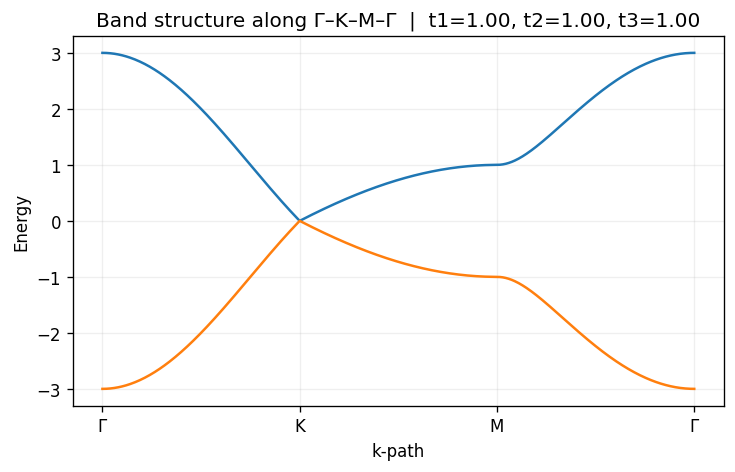

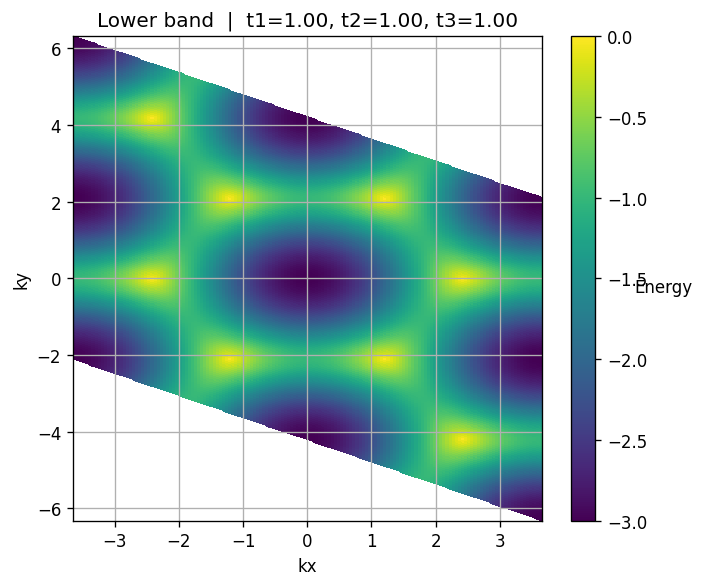

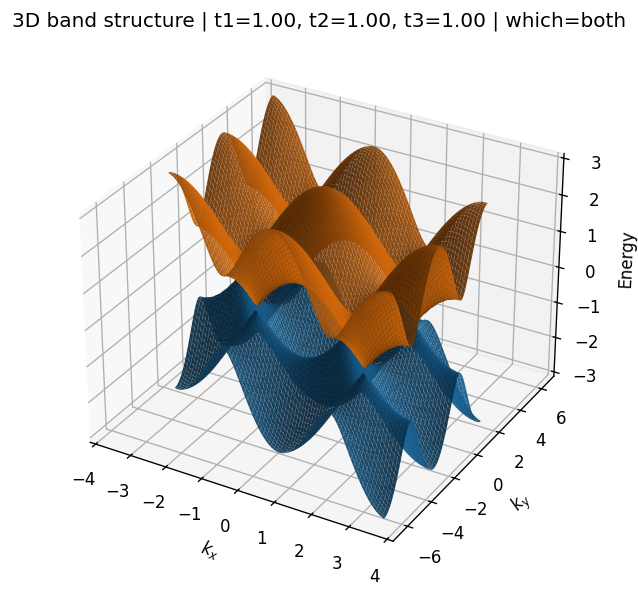

In [13]:
print("Example: isotropic case t1=t2=t3=1.0")
plot_band_path(t1=1.0, t2=1.0, t3=1.0, a=1.0, nseg=200, ylim=None)
plot_2d_band(t1=1.0, t2=1.0, t3=1.0, a=1.0, Nk=151, which="lower")
plot_3d_band(t1=1.0, t2=1.0, t3=1.0, a=1.0, Nk=81, which="both", elev=30, azim=-60, wire=False, zcenter=False)